# Libraries

In [133]:
import numpy as np
import scipy.integrate as sp
from scipy.stats import norm
import matplotlib.pyplot as plt 
import yfinance as yf 
import pandas as pd
from datetime import datetime

# Black-scholes model

In [90]:
def Black_scholes(sigma,T,option,K,S0,r):
    d1=[np.log(S0/K)+(r+(sigma**2)/2)*T]/(sigma*np.sqrt(T))
    d2=d1- sigma* np.sqrt(T)
    
    if option == "call":
        c=S0*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
        return c[0]
    if option == "put":
        d=K*np.exp(-r*T)*norm.cdf(-d2) - S0*norm.cdf(-d1)
        return d[0]
    else: 
        return ValueError("Invalid option type. Only Call or Put ")
    
    

In [91]:
print(f"Price of a call option using Black Scholes model: {Black_scholes(50, 47,  'call', 0.01, 0.01,0.01)}")

print(f"Price of a put option using Black Scholes model: {Black_scholes(50, 47,  'put', 0.01, 0.01,0.01)}")



Price of a call option using Black Scholes model: 0.01
Price of a put option using Black Scholes model: 0.006250022682827008


## Influence of S0 on the option price 

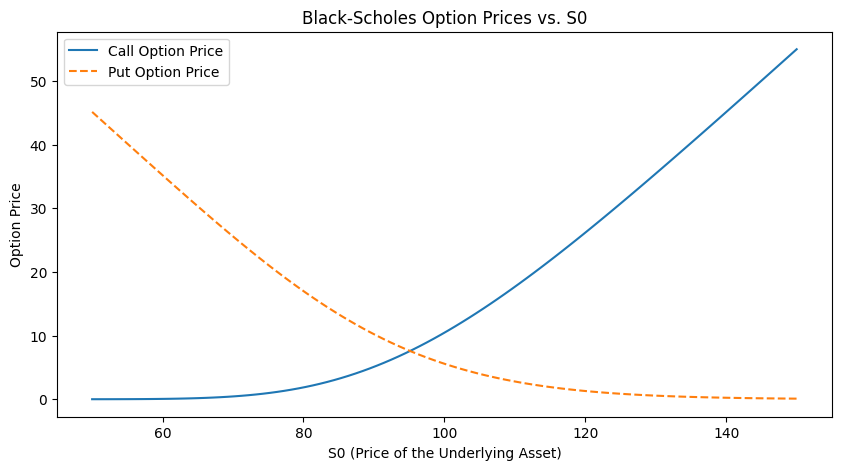

In [24]:
K = 100 
T = 1   
r = 0.05 
sigma = 0.2 


S_values = np.linspace(50, 150, 100)

call_prices = [Black_scholes(sigma,T,"call",K,S,r) for S in S_values]
put_prices = [Black_scholes(sigma,T,"put",K,S,r)  for S in S_values]


plt.figure(figsize=(10, 5))
plt.plot(S_values, call_prices, label='Call Option Price', linestyle='-')
plt.plot(S_values, put_prices, label='Put Option Price', linestyle='--')
plt.xlabel('S0 (Price of the Underlying Asset)')
plt.ylabel('Option Price')
plt.title('Black-Scholes Option Prices vs. S0')
plt.legend()


We can see that when we the price of the underlying asset increases the price of the call option increases too, and vice versa for the price of the put option

## Influence of volatility on the option price 

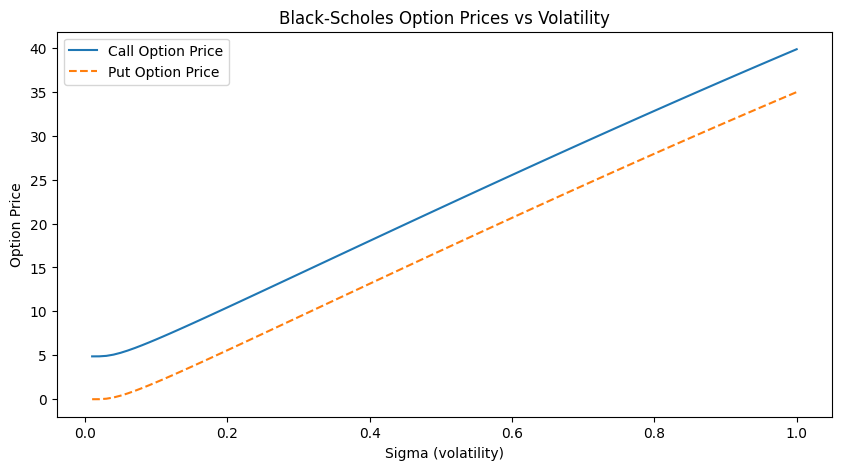

In [93]:
K = 100 
S0 = 100 
r = 0.05 
T= 1


sigma_values = np.linspace(0.01, 1, 100)

call_prices = [Black_scholes(sigma,T,"call",K,S0,r) for sigma in sigma_values]
put_prices = [Black_scholes(sigma,T,"put",K,S0,r)  for sigma in sigma_values]


plt.figure(figsize=(10, 5))
plt.plot(sigma_values, call_prices, label='Call Option Price', linestyle='-')
plt.plot(sigma_values, put_prices, label='Put Option Price', linestyle='--')
plt.xlabel('Sigma (volatility)')
plt.ylabel('Option Price')
plt.title('Black-Scholes Option Prices vs Volatility')
plt.legend()


## The impact of the risk free rate

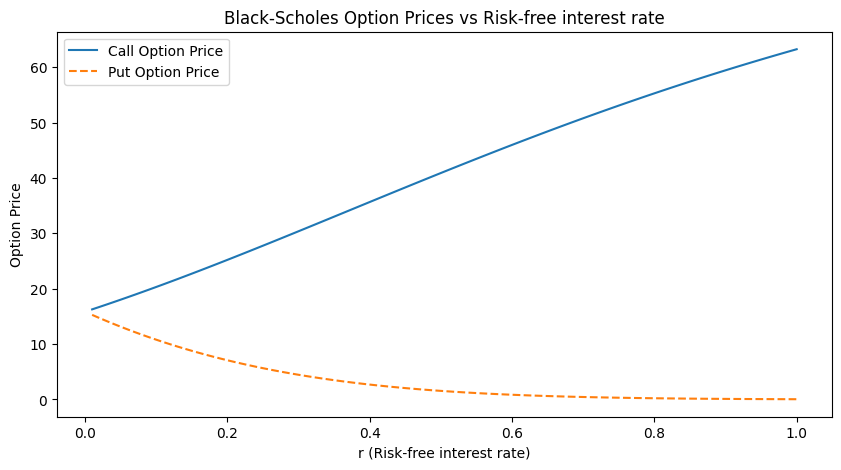

In [94]:
K = 100  
S0 = 100
r = 0.05 
T= 1 
sigma= 0.4 

interestrate_values = np.linspace(0.01, 1, 100)

call_prices = [Black_scholes(sigma,T,"call",K,S0,r) for r in interestrate_values]
put_prices = [Black_scholes(sigma,T,"put",K,S0,r)  for r in interestrate_values]


plt.figure(figsize=(10, 5))
plt.plot(sigma_values, call_prices, label='Call Option Price', linestyle='-')
plt.plot(sigma_values, put_prices, label='Put Option Price', linestyle='--')
plt.xlabel('r (Risk-free interest rate)')
plt.ylabel('Option Price')
plt.title('Black-Scholes Option Prices vs Risk-free interest rate')
plt.legend()

# Greeks implementation 

In [62]:
def Greeks_Black_scholes(sigma,T,K,S0,r):
    d1=[np.log(S0/K)+(r+(sigma**2)/2)*T]/(sigma*np.sqrt(T))
    d2=d1- sigma* np.sqrt(T)
    
    delta_call = norm.cdf(d1)
    delta_put = norm.cdf(d1) - 1
    
    theta_call = (-S0*norm.pdf(d1)*sigma)/(2*np.sqrt(T)) - r*K*np.exp(-r*T)*norm.cdf(d2)
    theta_put = (-S0*norm.pdf(d1)*sigma)/(2*np.sqrt(T)) + r*K*np.exp(-r*T)*norm.cdf(-d2)
    
    vega = S0*np.sqrt(T)*norm.pdf(d1)
    
    rho_call = K*T*np.exp(-r*T)*norm.cdf(d2)
    rho_put = -K*T*np.exp(-r*T)*norm.cdf(-d2)
    
    return {"Delta":(delta_call,delta_put),
            "Theta":(theta_call,theta_put),
            "Vega":vega,
            "Rho":(rho_call,rho_put)}

In [63]:
S0 = 100  # Price of the underlying asset
K = 100  # Strike price
T = 1    # Time to maturity (in years)
r = 0.05 # Risk-free interest rate
sigma = 0.2  # Volatility

Greeks = Greeks_Black_scholes(sigma,T,K,S0,r)
print(Greeks)

{'Delta': (array([0.63683065]), array([-0.36316935])), 'Theta': (array([-6.41402755]), array([-1.65788042])), 'Vega': array([37.52403469]), 'Rho': (array([53.23248155]), array([-41.8904609]))}


## Visualisation

C:\Users\X280\AppData\Local\Temp\ipykernel_4728\671591688.py:2: RuntimeWarning: divide by zero encountered in divide
  d1=[np.log(S0/K)+(r+(sigma**2)/2)*T]/(sigma*np.sqrt(T))
C:\Users\X280\AppData\Local\Temp\ipykernel_4728\671591688.py:8: RuntimeWarning: invalid value encountered in divide
  theta_call = (-S0*norm.pdf(d1)*sigma)/(2*np.sqrt(T)) - r*K*np.exp(-r*T)*norm.cdf(d2)
C:\Users\X280\AppData\Local\Temp\ipykernel_4728\671591688.py:9: RuntimeWarning: invalid value encountered in divide
  theta_put = (-S0*norm.pdf(d1)*sigma)/(2*np.sqrt(T)) + r*K*np.exp(-r*T)*norm.cdf(-d2)


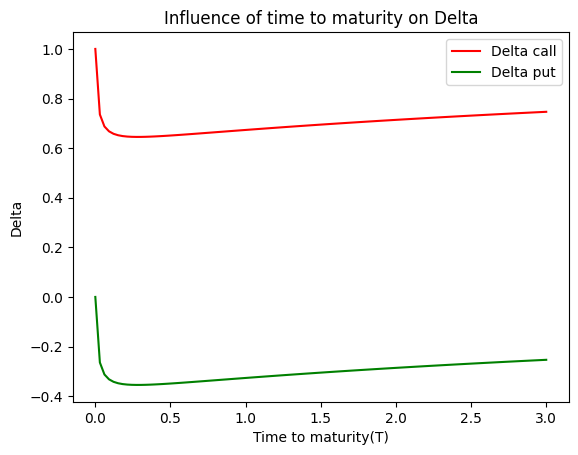

In [64]:
S0 = 102  
K = 100 
T = 1    
r = 0.05 
sigma = 0.2  

T_range=np.linspace(0,3,100)
delta_call=[Greeks_Black_scholes(sigma,T,K,S0,r)["Delta"][0][0] for T in T_range] 
delta_put=[Greeks_Black_scholes(sigma,T,K,S0,r)["Delta"][1][0] for T in T_range] 
plt.plot(T_range,delta_call,'r',label="Delta call")
plt.plot(T_range,delta_put,'g',label="Delta put")
plt.xlabel("Time to maturity(T)")
plt.ylabel("Delta")
plt.title("Influence of time to maturity on Delta")
plt.legend()

C:\Users\X280\AppData\Local\Temp\ipykernel_4728\671591688.py:2: RuntimeWarning: divide by zero encountered in log
  d1=[np.log(S0/K)+(r+(sigma**2)/2)*T]/(sigma*np.sqrt(T))


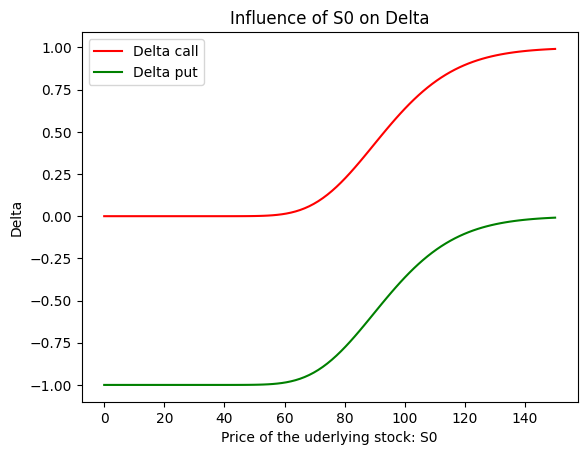

In [69]:
S0 = 102  
K = 100  
r = 0.05 
sigma = 0.2  
T = 1

S0_range=np.linspace(0,150,100)
delta_call=[Greeks_Black_scholes(sigma,T,K,S0,r)["Delta"][0][0] for S0 in S0_range] 
delta_put=[Greeks_Black_scholes(sigma,T,K,S0,r)["Delta"][1][0] for S0 in S0_range] 
plt.plot(S0_range,delta_call,'r',label="Delta call")
plt.plot(S0_range,delta_put,'g',label="Delta put")
plt.xlabel("Price of the uderlying stock: S0")
plt.ylabel("Delta")
plt.title("Influence of S0 on Delta")
plt.legend()

# Binomial Trees function

In [87]:
def Binomial_trees(sigma, T, K, S0, r, N, american=False, option="call"):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    a = np.exp(r * dt)
    p = (a - d) / (u - d)
    
    stock_prices = np.zeros(N + 1)
    option_values = np.zeros(N + 1)
    
    for i in range(N + 1):
        stock_prices[i] = S0 * (u ** i) * (d ** (N - i))
                                       
    
    if option == "call":
        option_values = np.maximum(stock_prices - K, 0)
    elif option== "put":
        option_values = np.maximum(K - stock_prices, 0)
    
    
    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            option_values[i] = (p * option_values[i] + (1 - p) * option_values[i + 1]) * np.exp(-r * dt)
            if american:
                if option == 'call':
                    option_values[i] = max(option_values[i], stock_prices[i] - K)
                elif option == 'put':
                    option_values[i] = max(option_values[i], K - stock_prices[i])
    
    return option_values[0]


In [97]:
bs_call_price =Black_scholes(sigma,T,"call",K,S0,r)
bs_put_price = Black_scholes(sigma,T,"put",K,S0,r)

binomial_call_price = Binomial_trees(sigma,T,K,S0,r,N,american=False,option="call")
binomial_put_price = Binomial_trees(sigma,T,K,S0,r,N,american=False,option="put")


print("Prix de l'option Call (Black-Scholes) :", bs_call_price)
print("Prix de l'option Put (Black-Scholes) :", bs_put_price)
print("Prix de l'option Call (Arbre Binomial) :", binomial_call_price)
print("Prix de l'option Put (Arbre Binomial) :", binomial_put_price)

Prix de l'option Call (Black-Scholes) : 10.450583572185565
Prix de l'option Put (Black-Scholes) : 5.573526022256971
Prix de l'option Call (Arbre Binomial) : 7.073587754664433
Prix de l'option Put (Arbre Binomial) : 8.02018672180799


# Etude de cas

In [119]:
ticker = 'AAPL'
data = yf.Ticker(ticker)
hist = data.history(period='1y')

In [129]:
expirations = data.options #les dates d'écheances

options_data=data.option_chain(expirations[0])
call=options_data.calls
put=options_data.puts

display(call.head(),put.head())

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL241122C00100000,2024-11-19 19:50:42+00:00,100.0,128.89,0.0,0.0,0.0,0.0,1.0,0,0.00001,True,REGULAR,USD
1,AAPL241122C00125000,2024-11-15 17:46:23+00:00,125.0,99.89,0.0,0.0,0.0,0.0,NaN,0,0.00001,True,REGULAR,USD
2,AAPL241122C00130000,2024-11-18 17:59:33+00:00,130.0,99.15,0.0,0.0,0.0,0.0,3.0,0,0.00001,True,REGULAR,USD
3,AAPL241122C00135000,2024-11-08 20:24:06+00:00,135.0,92.99,0.0,0.0,0.0,0.0,3.0,0,0.00001,True,REGULAR,USD
4,AAPL241122C00140000,2024-11-15 15:50:11+00:00,140.0,84.82,0.0,0.0,0.0,0.0,8.0,0,0.00001,True,REGULAR,USD


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL241122P00100000,2024-11-18 20:23:17+00:00,100.0,0.01,0.0,0.00,0.0,0.0,2.0,0,0.500005,False,REGULAR,USD
1,AAPL241122P00105000,2024-11-15 14:46:59+00:00,105.0,0.01,NaN,0.00,0.0,0.0,NaN,0,0.500005,False,REGULAR,USD
2,AAPL241122P00125000,2024-11-05 15:45:30+00:00,125.0,0.01,0.0,0.00,0.0,0.0,20.0,0,0.500005,False,REGULAR,USD
3,AAPL241122P00130000,2024-10-09 16:26:02+00:00,130.0,0.06,0.0,0.02,0.0,0.0,NaN,3,2.031255,False,REGULAR,USD
4,AAPL241122P00135000,2024-11-04 17:04:02+00:00,135.0,0.02,0.0,0.00,0.0,0.0,25.0,0,0.500005,False,REGULAR,USD


In [197]:
call['S0'] = hist['Close'].reset_index(drop=True)  
r = 0.05  
today = datetime.today()


call['expiration'] = pd.to_datetime(expirations[0])  # Ajouter la date d'expiration
call['T'] = (call['expiration'] - today).dt.days / 365

call['Price BS'] = call.apply(
    lambda x: Black_scholes(
        x['impliedVolatility'],  
         x['T'],  
       "call", 
        x['strike'],  
        x['S0'],  
        r
    ), axis=1
)

call['difference']=call['lastPrice'] - call['Price BS'] 


put['S0'] = hist['Close'].reset_index(drop=True)  
put['expiration'] = pd.to_datetime(expirations[0]) 
put['T'] = (put['expiration'] - today).dt.days / 365
put['Price BS'] = put.apply(
    lambda x: Black_scholes(
        x['impliedVolatility'], 
        x['T'],  
        "put",  
        x['strike'], 
        x['S0'],  
        r  
    ), axis=1
)


put['difference'] = put['lastPrice'] - put['Price BS']

display(call.head(),put.head())

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,inTheMoney,contractSize,currency,expiration,T,Price BS,S0,diffrence,difference,Price Binomial
0,AAPL241122C00100000,2024-11-19 19:50:42+00:00,100.0,128.89,0.0,0.0,0.0,0.0,1.0,0,...,True,REGULAR,USD,2024-11-22,0.00274,90.530345,190.516647,38.359655,38.359655,90.515650
1,AAPL241122C00125000,2024-11-15 17:46:23+00:00,125.0,99.89,0.0,0.0,0.0,0.0,NaN,0,...,True,REGULAR,USD,2024-11-22,0.00274,64.727724,189.710602,35.162276,35.162276,64.709609
2,AAPL241122C00130000,2024-11-18 17:59:33+00:00,130.0,99.15,0.0,0.0,0.0,0.0,3.0,0,...,True,REGULAR,USD,2024-11-22,0.00274,60.395157,190.377350,38.754843,38.754843,60.376353
3,AAPL241122C00135000,2024-11-08 20:24:06+00:00,135.0,92.99,0.0,0.0,0.0,0.0,3.0,0,...,True,REGULAR,USD,2024-11-22,0.00274,54.062361,189.043869,38.927639,38.927639,54.042880
4,AAPL241122C00140000,2024-11-15 15:50:11+00:00,140.0,84.82,0.0,0.0,0.0,0.0,8.0,0,...,True,REGULAR,USD,2024-11-22,0.00274,48.883908,188.864731,35.936092,35.936092,48.863742


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,S0,expiration,T,Price BS,difference
0,AAPL241122P00100000,2024-11-18 20:23:17+00:00,100.0,0.01,0.0,0.00,0.0,0.0,2.0,0,0.500005,False,REGULAR,USD,190.516647,2024-11-22,0.00274,3.996249e-135,0.010000
1,AAPL241122P00105000,2024-11-15 14:46:59+00:00,105.0,0.01,NaN,0.00,0.0,0.0,NaN,0,0.500005,False,REGULAR,USD,189.710602,2024-11-22,0.00274,2.961961e-114,0.010000
2,AAPL241122P00125000,2024-11-05 15:45:30+00:00,125.0,0.01,0.0,0.00,0.0,0.0,20.0,0,0.500005,False,REGULAR,USD,190.377350,2024-11-22,0.00274,4.404791e-59,0.010000
3,AAPL241122P00130000,2024-10-09 16:26:02+00:00,130.0,0.06,0.0,0.02,0.0,0.0,NaN,3,2.031255,False,REGULAR,USD,189.043869,2024-11-22,0.00274,8.876617e-04,0.059112
4,AAPL241122P00135000,2024-11-04 17:04:02+00:00,135.0,0.02,0.0,0.00,0.0,0.0,25.0,0,0.500005,False,REGULAR,USD,188.864731,2024-11-22,0.00274,1.693917e-38,0.020000


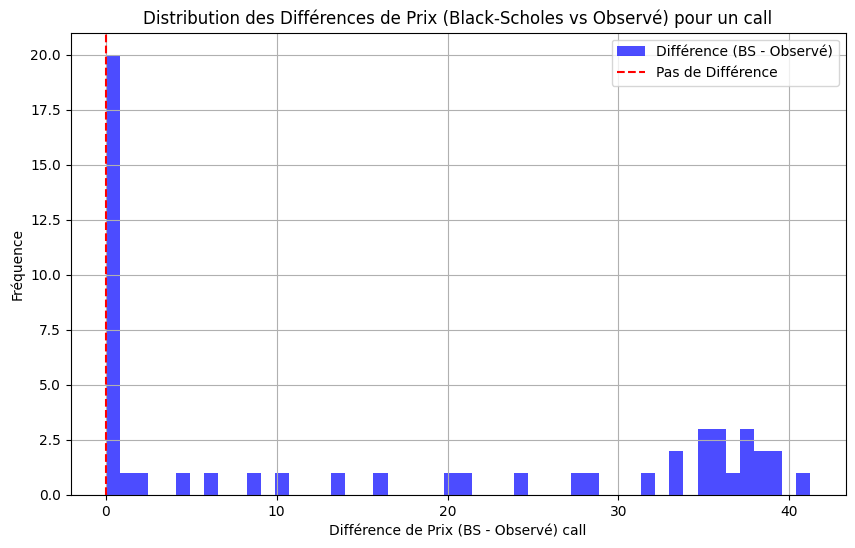

In [198]:
plt.figure(figsize=(10, 6))
plt.hist(call['difference'], bins=50, alpha=0.7, color='blue', label="Différence (BS - Observé)")
plt.axvline(0, color='red', linestyle='--', label="Pas de Différence")
plt.xlabel("Différence de Prix (BS - Observé) call")
plt.ylabel("Fréquence")
plt.title("Distribution des Différences de Prix (Black-Scholes vs Observé) pour un call")
plt.legend()
plt.grid(True)
plt.show()

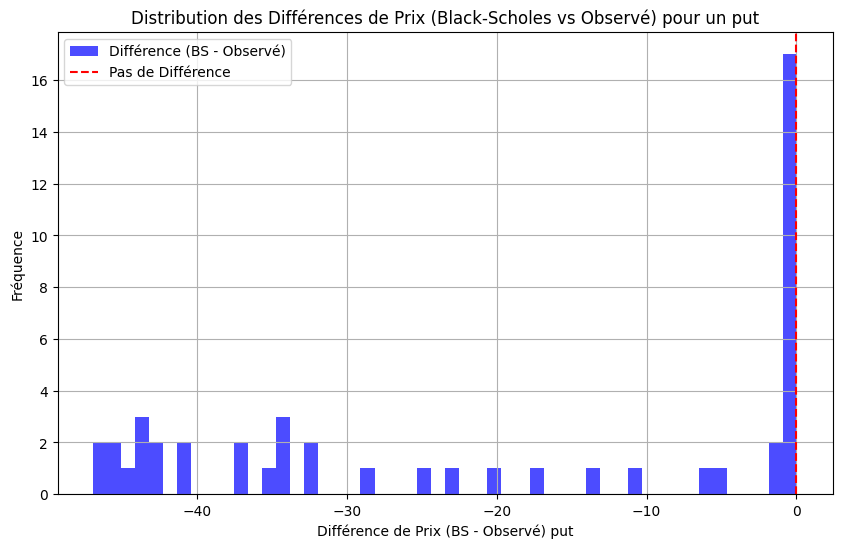

In [199]:
plt.figure(figsize=(10, 6))
plt.hist(put['difference'], bins=50, alpha=0.7, color='blue', label="Différence (BS - Observé)")
plt.axvline(0, color='red', linestyle='--', label="Pas de Différence")
plt.xlabel("Différence de Prix (BS - Observé) put")
plt.ylabel("Fréquence")
plt.title("Distribution des Différences de Prix (Black-Scholes vs Observé) pour un put")
plt.legend()
plt.grid(True)
plt.show()